In [2]:
import pandas as pd
import re

In [3]:
videos = pd.read_csv("./data/video-stats.csv")
videos.head()

Id  Year  Month  Day VideoDuration   
0  00114ad1-489d-47dd-a536-4b8d77283b1a  2023      4    1         01:12  \
1  015e8561-1087-442e-a71e-43c8b6fdcd75  2023      4    1         01:12   
2  00a36156-5807-4c0c-abb7-d2e931505f2f  2023      4    1         01:05   
3  0275a006-5bc5-4450-874b-c8cccf9c72a7  2023      4    1         01:27   
4  0267da8d-1a84-4e46-ad72-c94fc2b89c8f  2023      4    1         01:19   

   VideoWeight  
0     14113329  
1     16577519  
2     12968662  
3     11022998  
4     33007044

In [4]:
videos['TimeSplitted'] = videos['VideoDuration'].str.split(':')
videos.head(5)

Id  Year  Month  Day VideoDuration   
0  00114ad1-489d-47dd-a536-4b8d77283b1a  2023      4    1         01:12  \
1  015e8561-1087-442e-a71e-43c8b6fdcd75  2023      4    1         01:12   
2  00a36156-5807-4c0c-abb7-d2e931505f2f  2023      4    1         01:05   
3  0275a006-5bc5-4450-874b-c8cccf9c72a7  2023      4    1         01:27   
4  0267da8d-1a84-4e46-ad72-c94fc2b89c8f  2023      4    1         01:19   

   VideoWeight TimeSplitted  
0     14113329     [01, 12]  
1     16577519     [01, 12]  
2     12968662     [01, 05]  
3     11022998     [01, 27]  
4     33007044     [01, 19]

In [5]:
def getMinutes(duration):
        if len(duration) == 2:
            return duration[0]
        else:
            return duration[0] * 60 + duration[1] if duration[0] == 00 else duration[1]

In [6]:
videos['OfficialDuration'] = videos['TimeSplitted'].apply(getMinutes)
videos

Id  Year  Month  Day VideoDuration   
0      00114ad1-489d-47dd-a536-4b8d77283b1a  2023      4    1         01:12  \
1      015e8561-1087-442e-a71e-43c8b6fdcd75  2023      4    1         01:12   
2      00a36156-5807-4c0c-abb7-d2e931505f2f  2023      4    1         01:05   
3      0275a006-5bc5-4450-874b-c8cccf9c72a7  2023      4    1         01:27   
4      0267da8d-1a84-4e46-ad72-c94fc2b89c8f  2023      4    1         01:19   
...                                     ...   ...    ...  ...           ...   
76699  fc8c1578-d6f8-4e8f-adac-400b73638298  2023      6   27      00:01:53   
76700  fca9b20c-3de1-4ba2-a799-19dbfe1bc56d  2023      6   27      00:01:52   
76701  fec52545-4b5c-4f5c-8193-11762d2cd124  2023      6   27      00:01:59   
76702  febd9727-8120-44ae-ba14-ce365a461692  2023      6   27      00:03:10   
76703  feef4f74-8074-4b90-bc2a-5841f52f4784  2023      6   27      00:03:27   

       VideoWeight  TimeSplitted OfficialDuration  
0         14113329      [01, 12]               01  
1         16577519      [01, 12]               01  
2         12968662      [01, 05]               01  
3         11022998      [01, 27]               01  
4         33007044      [01, 19]               01  
...            ...           ...              ...  
76699     51393004  [00, 01, 53]               01  
76700     24982337  [00, 01, 52]               01  
76701     17328011  [00, 01, 59]               01  
76702     86066302  [00, 03, 10]               03  
76703     41215588  [00, 03, 27]               03  

[76704 rows x 8 columns]

In [7]:
videos.to_csv("./data/video-stats-cleaned.csv",index=False)

## Bandwidth Analysis

In [13]:
colombia_bandwidth = pd.read_excel("./data/dollacity-store-bandwidth-capacity.xlsx", sheet_name="Colombia")
el_salvador_bandwidth = pd.read_excel("./data/dollacity-store-bandwidth-capacity.xlsx", sheet_name="El Salvador")
guatemala_bandwidth = pd.read_excel("./data/dollacity-store-bandwidth-capacity.xlsx", sheet_name="Guatemala")
peru_bandwidth = pd.read_excel("./data/dollacity-store-bandwidth-capacity.xlsx", sheet_name="Peru")


In [14]:
colombia_bandwidth.fillna(0, inplace=True)
el_salvador_bandwidth.fillna(0, inplace=True)
guatemala_bandwidth.fillna(0, inplace=True)
peru_bandwidth.fillna(0, inplace=True)


In [31]:
def cleanBandWidthValues(bandwith: str):
    bandwith = bandwith.strip()
    bandwith_cleaned = 0
    if  bandwith.startswith("M") or bandwith.endswith("M"):
        bandwith_cleaned = bandwith.replace("M", "")
    elif bandwith.startswith("MB") or bandwith.endswith("MB"):
        bandwith_cleaned = bandwith.replace("MB", "")
    elif bandwith.startswith("B") or bandwith.endswith("B"):
        bandwith_cleaned = bandwith.replace("B", "")
    elif "LTE" in bandwith:
        bandwith_cleaned = bandwith.replace("LTE", "0")
    else:
        return int(bandwith)
    return int(bandwith_cleaned)

In [17]:
colombia_bandwidth["BW Claro"] = colombia_bandwidth["BW Claro"].astype(str).apply(cleanBandWidthValues)
colombia_bandwidth["BW TigoUNE"] = colombia_bandwidth["BW TigoUNE"].astype(str).apply(cleanBandWidthValues)
colombia_bandwidth["BW C&W"] = colombia_bandwidth["BW C&W"].astype(str).apply(cleanBandWidthValues)


In [21]:
el_salvador_bandwidth["BW Tigo"] = el_salvador_bandwidth["BW Tigo"].astype(str).apply(cleanBandWidthValues)
el_salvador_bandwidth["BW Claro"] = el_salvador_bandwidth["BW Claro"].astype(str).apply(cleanBandWidthValues)

In [34]:
guatemala_bandwidth["BW Tigo"] = guatemala_bandwidth["BW Tigo"].astype(str).apply(cleanBandWidthValues) 
guatemala_bandwidth["BW Claro"] = guatemala_bandwidth["BW Claro"].astype(str).apply(cleanBandWidthValues) 

In [38]:
peru_bandwidth["BW Claro"] = peru_bandwidth["BW Claro"].astype(str).apply(cleanBandWidthValues)
peru_bandwidth["BW Optical"] = peru_bandwidth["BW Optical"].astype(str).apply(cleanBandWidthValues)

### Reverse Columns (Unpivot)

In [42]:
df_colombia_bw = colombia_bandwidth.melt(
    id_vars=[
        "Country",
        "Store",
    ],
    var_name="Provider",
    value_name="Bandwidth",
)

In [45]:
df_el_salvador_bw = el_salvador_bandwidth.melt(
    id_vars=[
        "Country",
        "Store",
    ],
    var_name="Provider",
    value_name="Bandwidth",
)

In [48]:
df_guatemala_bw = guatemala_bandwidth.melt(
    id_vars=[
        "Country",
        "Store",
    ],
    var_name="Provider",
    value_name="Bandwidth",
)

In [51]:
df_peru_bw = peru_bandwidth.melt(
    id_vars=[
        "Country",
        "Store",
    ],
    var_name="Provider",
    value_name="Bandwidth",
)

In [57]:
all_stores_bandwidth = pd.concat(
    [df_colombia_bw, df_el_salvador_bw, df_guatemala_bw, df_peru_bw], axis=0
)


In [59]:
all_stores_bandwidth.to_csv("./data/dollarcity_all_stores_bandwidth.csv", index=False)

## Visualization

In [8]:
video_stats = pd.read_csv("./data/video-stats-cleaned.csv")

In [9]:
video_stats.head()

Id  Year  Month  Day VideoDuration   
0  00114ad1-489d-47dd-a536-4b8d77283b1a  2023      4    1         01:12  \
1  015e8561-1087-442e-a71e-43c8b6fdcd75  2023      4    1         01:12   
2  00a36156-5807-4c0c-abb7-d2e931505f2f  2023      4    1         01:05   
3  0275a006-5bc5-4450-874b-c8cccf9c72a7  2023      4    1         01:27   
4  0267da8d-1a84-4e46-ad72-c94fc2b89c8f  2023      4    1         01:19   

   VideoWeight  TimeSplitted  OfficialDuration  
0     14113329  ['01', '12']                 1  
1     16577519  ['01', '12']                 1  
2     12968662  ['01', '05']                 1  
3     11022998  ['01', '27']                 1  
4     33007044  ['01', '19']                 1

<Axes: xlabel='Month', ylabel='VideoWeight'>

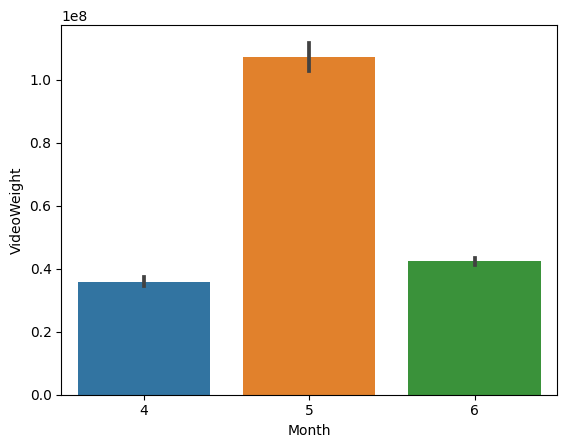

In [11]:
import seaborn as sns
sns.barplot(data=video_stats, x="Month", y="VideoWeight")